기본설정

In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import os
import sys
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import seaborn as sns

In [0]:
path = 'drive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n', 
      os.listdir(path + 'test'),'\n', 
      os.listdir(path + '../metrics'),'\n', 
      os.listdir(path + '../scripts'))

['train_label.csv', 'train_activity.csv', 'train_combat.csv', 'train_payment.csv', 'train_pledge.csv', 'train_trade.csv'] 
 ['test1_payment.csv', 'test2_payment.csv', 'test1_activity.csv', 'test1_combat.csv', 'test1_pledge.csv', 'test1_trade.csv', 'test2_activity.csv', 'test2_combat.csv', 'test2_pledge.csv', 'test2_trade.csv'] 
 ['score_function.py', '자체성능평가함수안내.pdf', 'score_function.r', '__pycache__', 'lhh_inference', 'bjw_inference', 'hh_inference', 'nes_inference', 'metrics_test_lhh.ipynb'] 
 ['explortary data', 'data merge', 'model']


In [0]:
def open_csvs(path):

    dflist = os.listdir(path)
    mod = sys.modules[__name__]
  
    for df in tqdm_notebook(dflist):
        tmp = pd.read_csv(path+df,engine='python' ) #.fillna('')
    
        setattr(mod, '{}'.format(df.split('.')[0]), tmp)

In [0]:
open_csvs(path+'train/') # 지금왜 작동 안되는지 모르겠다///

---
# 데이터 정의 - 개괄

### 레이블 (train_label)

유저의 생존 기간과 일별 평균 결제 금액을 제공

- acc_id 유저 아이디
- survival_time 생존 기간(일)
- amount_spent 일별 평균 결제 금액

In [0]:
train_label.head(3)

,acc_id,survival_time,amount_spent
0,27835,64,0.002559
1,12351,64,0.120154
2,125437,55,0.182593


In [0]:
len(train_label['acc_id'].unique())

40000

In [0]:
train_label.describe()

,survival_time,amount_spent
count,40000.000000,40000.000000
mean,45.706700,0.124931
std,23.265907,0.722272
min,1.000000,0.000000
25%,24.000000,0.000000
50%,64.000000,0.020343
75%,64.000000,0.106119
max,64.000000,39.412632


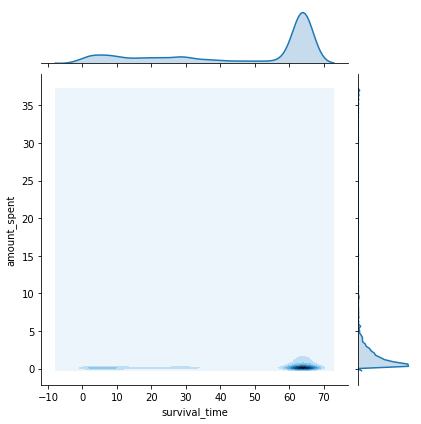

In [0]:
sns.jointplot(x=train_label["survival_time"], y=10*(np.log1p(train_label['amount_spent'])), kind="kde")

### 활동 (train_activity)

대상 유저의 캐릭터별 활동 이력 (일별 데이터)

- day 날짜
- acc_id 유저 아이디
- char_id 캐릭터 아이디
- server 캐릭터 서버
- playtime 일일 플레이시간
- npc_kill npc 를 죽인 횟수
- solo_exp 솔로 사냥 획득 경험치
- party_exp 파티 사냥 획득 경험치
- quest_exp 퀘스트 획득 경험치
- boss_monster 보스 몬스터 타격 여부 (0=미타격 ,1= 타격)
- death 캐릭터 사망 횟수
- revive 부활 횟수
- exp_recovery 경험치 복구 횟수(성당)
- fishing 일일 낚시 시간
- private_shop 일일 개인상점 운영 시간
- game_money_change 일일 아데나 변동량
- enchant_count 7 레벨 이상 아이템 인첸트 시도 횟수

In [0]:
train_activity.tail(3)

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
1601831,28,60388,78905,bs,1.137558,0.0,0.0,0.0,0.0,0,0.245883,0.247337,0.0,0.0,0.0,-0.003670,0.0
1601832,28,72319,196592,bs,1.142240,0.0,0.0,0.0,0.0,0,0.491767,0.494674,0.0,0.0,0.0,-0.002003,0.0
1601833,28,73739,383802,bs,1.125855,0.0,0.0,0.0,0.0,0,0.491767,0.494674,0.0,0.0,0.0,0.001131,0.0


In [0]:
train_activity.iloc[:,4:].describe()

,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
count,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06,1.601834e+06
mean,1.043823e+00,4.947465e-01,2.333977e-01,1.290938e-01,1.056613e-01,1.233842e-01,7.406203e-02,6.628034e-02,5.687179e-02,1.937402e-01,2.628405e-01,-1.301906e-03,1.621690e-02
std,1.205552e+00,1.120514e+00,1.236795e+00,1.102296e+00,1.092334e+00,3.288778e-01,7.261568e-01,7.245752e-01,1.005399e+00,5.764657e-01,8.199551e-01,8.827070e-01,8.780636e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.478808e+01,0.000000e+00
25%,3.979114e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.335242e-03,0.000000e+00
50%,4.517465e-01,3.379401e-03,2.315290e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.764854e+00,3.463886e-01,2.178079e-02,0.000000e+00,8.676596e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.030153e-03,0.000000e+00
max,3.370544e+00,1.786622e+01,6.932613e+01,1.064465e+02,3.602985e+01,1.000000e+00,2.215410e+02,2.228505e+02,7.974367e+01,3.370544e+00,3.370544e+00,7.386443e+01,1.888458e+02


In [0]:
train_activity.groupby(['server']).sum().iloc[:,3:7]#각 서버별

,playtime,npc_kill,solo_exp,party_exp
server,,,,
aa,60550.915390,27749.693171,9166.086815,3727.321776
ab,65697.606598,31184.792492,9469.711155,1639.062075
ac,61683.551428,28797.406850,7336.927734,1682.057234
ad,73548.431030,35993.857938,10360.039186,3171.847175
ae,57992.501996,27324.279298,8159.953343,2308.570446
af,49198.470753,21974.965228,5662.378839,2016.326456
ag,61068.658962,29358.218116,7214.047082,2086.890009
ah,37010.423907,19527.062623,5388.200756,1771.808013
ai,53256.710472,26285.978603,6796.474116,1297.394381


In [0]:
60388

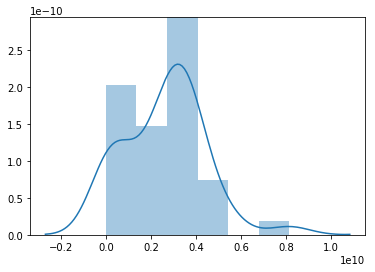

In [0]:
tmp = train_activity.groupby(['day','acc_id']).mean().iloc[:,1:2]

sns.distplot(train_activity.groupby('server').sum().iloc[:,1:2])

In [0]:
print(len(train_activity['acc_id'].unique()))
print(len(train_activity['char_id'].unique()))

40000
150960


In [0]:
train_activity[train_activity['acc_id']==60388]['server'].unique()

# 하나의 아이디는 하나의 서버인가? -> 아님

array(['bb', 'bc', 'bs'], dtype=object)

In [0]:
def group(df,by_list):
  
  names = df.columns
  
  tmp = df.groupby(by_list)

### 전투 (train_combat)

캐릭터 전투 활동 정보 일일 집계 제공

- day 날짜
- acc_id 유저 아이디
- char_id 캐릭터 아이디
- server 캐릭터 서버
- class 직업 : 0 군주, 기사 1, 요정 2, 마법사 3, 다크엘프4, 용기사 5, 환술사 6, 전사 7
- level 레벨
- pledge_cnt 혈맹 전투 횟수
- random_attacker_cnt 무작위 공격을 행한 전투 횟수
- random_defender_cnt 무작위 공격자로부터 공격을 받은 전투 횟수
- temp_cnt 단발성 전투 횟수
- same_pledge_cnt 동일 혈맹 전투 횟수
- etc_cnt 기타 전투 횟수
- num_opponent 전투 상대 캐릭터 수


In [0]:
train_combat.head(3)

,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
0,13809,54861,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13809,256332,ap,2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13809,307293,ap,3,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
train_combat.describe()

array([2, 3, 7, 4, 1, 5, 0, 6])

## 결제 (train_payment)

유저 결제 금액 일일 집계 제공

- day 날짜
- acc_id 유저 아이디
- amount_spent 결제 금액

In [0]:
train_payment.head(3)

,acc_id,amount_spent
0,27835,0.826123
1,27835,0.011735
2,27835,0.035204


In [0]:
len(train_payment['acc_id'].unique())

23726

In [0]:
train_payment.groupby(['acc_id']).sum()['amount_spent'].describe() #월별합계

count    23726.000000
mean         1.870931
std          2.098117
min          0.011735
25%          0.371990
50%          1.056123
75%          2.461911
max         12.556131
Name: amount_spent, dtype: float64

count    66432.000000
mean         0.668198
std          0.909331
min          0.011735
25%          0.105612
50%          0.352041
75%          0.946990
max         11.733528
Name: amount_spent, dtype: float64

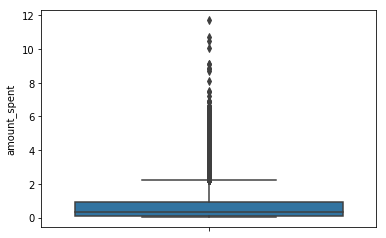

In [0]:
sns.boxplot(y = train_payment['amount_spent'])

train_payment['amount_spent'].describe() #일자별

In [0]:
len(train_payment[train_payment['amount_spent']==max(train_payment['amount_spent'])])

1

## 혈맹 (train_pledge)

캐릭터 소속 혈맹 구성원들의 전투 정보 일일 집계 제공

- day 날짜
- acc_id 유저 아이디
- char_id 캐릭터 아이디
- server 캐릭터 서버
- pledge_id 혈맹 아이디
- play_char_cnt 접속 혈맹 캐릭터 수
- combat_char_cnt 전투 참여 혈맹 캐릭터 수
- pledge_combat_cnt 혈맹 전투 횟수의 합
- random_attacker_cnt 무작위공격(막피)을 행한 전투 횟수의 합
- random_defender_cnt 무작위공격(막피)으로 피해받은 전투 횟수의 합
- same_pledge_cnt 동일 혈맹 전투 횟수의 합
- temp_cnt 단발성 전투 횟수의 합
- etc_cnt 기타 전투 횟수의 합
- combat_play_time 전투 캐릭터 플레이 시간의 합
- non_combat_play_time 非전투 캐릭터 플레이 시간의 합


In [0]:
train_pledge.head(3)

## 거래 (train_trade)

캐릭터 거래 이력(교환, 개인상점) 일일 집계 제공

- day 거래 발생 일
- time 거래 발생 시간 (00:00:00 ~ 23:59:59)
- type 거래 구분 (교환창 = 1, 개인상점 = 0)
- server 거래 발생 서버
- source_acc_id 주는/판매 유저 아이디
- source_char_id 주는/판매 캐릭터 아이디
- target_acc_id 받는/구매 유저 아이디
- target_char_id 받는/구매 캐릭터 아이디
- item_type 아이템 종류 : 총 7개

weapon (무기), armor (방어구), accessory(액세서리), adena (아데나),  spell (스킬북), enchant_scroll (강화주문서), etc (기타)


- item_amount 거래 아이템 수량
- item_price 거래 가격

교환창 거래 (Type=1)일 경우 NA


In [0]:
train_trade.head(3)

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
0,7,21:13:05,1,ag,11439,385109,48152,34247,enchant_scroll,4.793968e-08,
1,2,15:33:00,1,al,22220,259705,43228,379826,enchant_scroll,4.314571e-06,
2,1,14:24:53,1,al,18212,164230,38145,34209,accessory,7.190952e-08,


In [0]:
len(train_trade['item_type'].unique())

7

In [0]:
len(train_trade['item_price'].isna()) # 교환장 거래 수

1849325

---
# trade와 payment 연결하여 인퍼런스 얻어보자!

## 1. EDA - payment

In [0]:
train_payment.head(3)

,day,acc_id,amount_spent
0,18,27835,0.826123
1,23,27835,0.011735
2,27,27835,0.035204


### 아이디 별

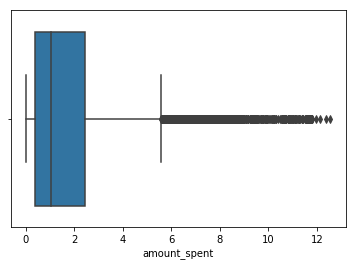

In [0]:
# 아이디별 지출의 합을 봐보자!!

sns.boxplot(train_payment.groupby('acc_id').sum()['amount_spent'])

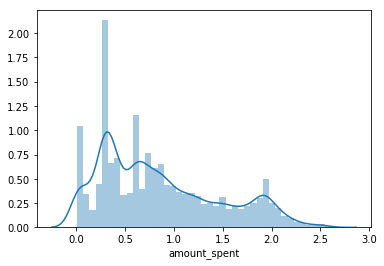

In [0]:
sns.distplot(np.log1p(train_payment.groupby('acc_id').sum()['amount_spent']))

아이디별 지출의 합을 살펴보면 절대적으로 좌편향된 데이터가 발생함!!

그러나 상자그림을 살펴보면 minimum은 + 값임 (0이 없음!!)

==> 왜냐? 결제를 아예 안한 사람은 잡히지 않으니까!!!!

나머지를 0으로 보아야 함!!

총 4만명중의 23726명의 데이터 밖에 없음!!

-> 나머지의 pay값을 0으로 잡아야할듯!!!

==> 만약 이때 정규 결제가 발생하지 않았는데 사용자 간 거래가 발생한다면 유효한 아이디!!

다른 거래가 발생하지 않는다면 라이트한 즐겜러

In [0]:
train_payment.groupby('acc_id').sum().describe()

,day,amount_spent
count,23726.000000,23726.000000
mean,41.197505,1.870931
std,35.424637,2.098117
min,1.000000,0.011735
25%,17.000000,0.371990
50%,29.000000,1.056123
75%,56.000000,2.461911
max,301.000000,12.556131


### 일자 별

In [0]:
train_payment['day'].value_counts().sort_index()

1     4218
2     2701
3     2270
4     2101
5     2209
6     2046
7     2033
8     2157
9     1825
10    1769
11    1840
12    2046
13    1642
14    1799
15    1681
16    1654
17    4579
18    2796
19    2733
20    2271
21    2044
22    2292
23    2407
24    2561
25    2795
26    2623
27    2592
28    2748
Name: day, dtype: int64

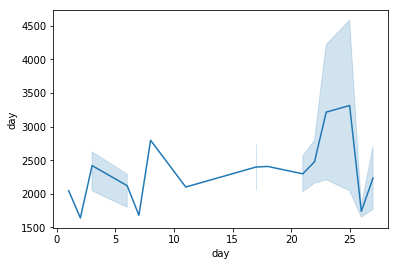

In [0]:
# 일자별 결제 횟수

sns.lineplot(x = train_payment['day'] ,y = train_payment['day'].value_counts().sort_index())

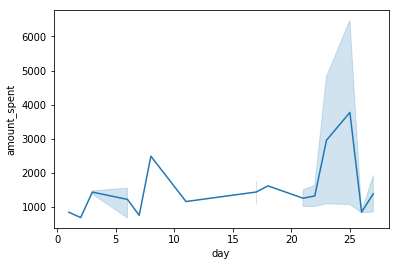

In [0]:
#일자별 지출의 합
sns.lineplot(x = train_payment['day'] ,y = train_payment.groupby('day')['amount_spent'].sum())

거의 동일한 정도임을 알 수 있음

In [0]:
len(train_payment['acc_id'].unique())

23726

In [0]:
tmp = train_payment.groupby('acc_id').sum()
len(tmp[tmp['amount_spent']==np.min(tmp['amount_spent'])])

# 800명이 min!!

800

In [0]:
# MINIMUM 지출자 뽑기!
minimum_idx = list(tmp[tmp['amount_spent']==np.min(tmp['amount_spent'])].index)
len(minimum_idx)

800

## 2. EDA - trade

In [0]:
train_trade = train_trade.sort_values(by=['day','time'])

train_trade.head(3)

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN


In [0]:
len(train_trade['source_acc_id'].unique()) # 파는 사람 아이디 왤케많은겨??? 엥이다 정말...???!?!?

60645

In [0]:
len(train_trade['target_acc_id'].unique()) # 사는것도 무슨일임??? 

72300

In [0]:
len(train_trade['server'].unique()) # 나머지 9개는 거래가 되지 않는 곳인가봄...

31

In [0]:
pay_id = train_payment['acc_id'].unique() # 23726개
trade_sell_id = train_trade['source_acc_id'].unique() # 60645
trade_buy_id = train_trade['target_acc_id'].unique() # 

In [0]:
paid_seller = [i in trade_sell_id for i in pay_id]
paid_buyer = [i in trade_buy_id for i in pay_id]

np.sum(paid_seller)
print()
np.sum(paid_buyer)

19042

21858

실제 리니지 공식 상점에서 캐쉬 결제를 한 사람(PAYMENT)이 가치가 큰 고객이다.

그러나, 유저간의 거래(TRADE)를 하는 고객

- 파는사람 60645명 중 실제 PAY하는 사람 **19042명**
- 사는 사람 72300명 중 실제 PAY하는 사람 **21858명**

### 계정별로 나눠서 바라보자!!

In [0]:
# 수시로 거래하는 계정 있을 거임!! 
# --> condition 초과 거래가 발생한 계정만을 가져올것임!!

def count_idx_by_condition(df,str_df_col,int_condition):
    idx = np.array(df[str_df_col].value_counts().keys().tolist())
    con = np.array(df[str_df_col].value_counts() > int_condition).tolist()
  
    freq_idx = idx[con]
  
    result_df = df[df[str_df_col].isin(freq_idx)]
    return result_df

In [0]:
trade_over_100 = count_idx_by_condition(train_trade,'source_acc_id',100)

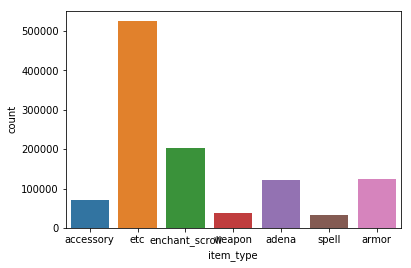

In [0]:
sns.countplot(trade_over_100['item_type'])

In [0]:
len(trade_over_100['source_acc_id'].unique())

# 100번이상 판매한 사람 = 3587명

3587

In [0]:
trade_over_100['source_acc_id'].value_counts().keys()

Int64Index([ 59264,  50413, 116315,  52260,  68330,  92665,  35362,  14421,
            123027,  41141,
            ...
             85608, 117604, 103020, 124774,  23763, 120707, 102586,  26456,
             43267,  14097],
           dtype='int64', length=3587)

제일 거래를 많이한 **id = 59264** 위주로 한번 봐보자!!

In [0]:
trade_id_59264 = trade_over_100[trade_over_100['source_acc_id']==59264].sort_values(by=['day','time'])

각 거래 사이사이에 있는 정보는?


In [0]:
trade_id_59264.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
45319,1,00:10:41,0,ar,59264,87930,104573,366069,enchant_scroll,2.396984e-08,0.003809
336529,1,00:11:20,0,ar,59264,87930,104573,366069,enchant_scroll,2.396984e-08,0.003809
364527,1,00:12:06,0,ar,59264,87930,104573,366069,enchant_scroll,2.396984e-08,0.003809
298509,1,00:17:19,0,ar,59264,87930,51509,224159,enchant_scroll,7.190952e-08,0.011998
376760,1,00:27:36,0,ar,59264,87930,118543,175810,enchant_scroll,2.396984e-08,0.002095


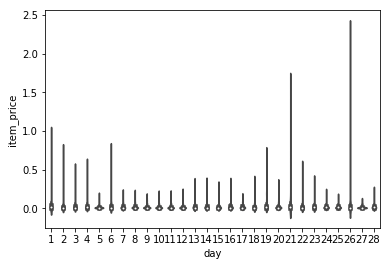

In [0]:
sns.violinplot(y='item_price',x='day',data=trade_id_59264)

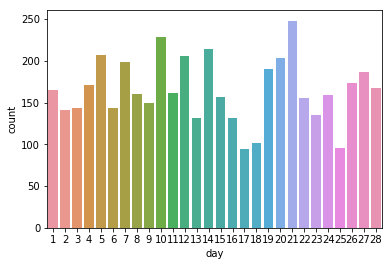

In [0]:
sns.countplot(trade_id_59264['day']) #전반적으로 전부 많이 거래

In [0]:
trade_id_59264['server'].unique() # 단일서버에서 활동

array(['ar'], dtype=object)

In [0]:
trade_id_59264['type'].value_counts()

0    4614
1       3
Name: type, dtype: int64

In [0]:
train_trade.describe()

,day,type,source_acc_id,source_char_id,target_acc_id,target_char_id,item_amount,item_price
count,1.849325e+06,1.849325e+06,1.849325e+06,1.849325e+06,1.849325e+06,1.849325e+06,1.849325e+06,8.091820e+05
mean,1.481701e+01,5.624447e-01,6.581836e+04,2.012996e+05,6.583349e+04,1.995040e+05,1.281517e-01,1.980335e-01
std,8.094081e+00,4.960855e-01,3.778875e+04,1.151923e+05,3.761667e+04,1.145293e+05,8.270533e-01,8.199873e-01
min,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.396984e-08,9.521861e-08
25%,8.000000e+00,0.000000e+00,3.359500e+04,1.016660e+05,3.337100e+04,1.005850e+05,2.396984e-08,3.565961e-03
50%,1.500000e+01,1.000000e+00,6.559100e+04,2.007530e+05,6.641700e+04,1.994770e+05,1.198492e-07,1.830483e-02
75%,2.200000e+01,1.000000e+00,9.825300e+04,3.023900e+05,9.820700e+04,2.989620e+05,6.543766e-06,9.129460e-02
max,2.800000e+01,1.000000e+00,1.304740e+05,3.974380e+05,1.304730e+05,3.974380e+05,8.288431e+01,6.578654e+01


In [0]:
np.sum(train_trade[train_trade['source_acc_id'] == 59264]['item_amount']) #파는 것
print()
np.sum(train_trade[train_trade['target_acc_id'] == 59264]['item_amount']) #사는 것

0.0010068770679452564

0.0003424331236648557

In [0]:
trade_id_59264['type'].value_counts() #교환장 거래보다 개인상점 거래를 훨씬 많이함!!!

0    4614
1       3
Name: type, dtype: int64

In [0]:
# 일반화 해보자

trade_over_100['sell_count'] = [1 for i in range(len(trade_over_100))]
trade_over_100['exchange'] = trade_over_100['type'].apply(lambda x: 1 if x==1 else 0)
trade_over_100['personal'] = trade_over_100["type"].apply(lambda x: 1 if x==0 else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
trade_over_100.groupby('source_acc_id').sum().iloc[:,5:] 
# 그냥 타입을 보기보다는 두 변수로 나눠서 보자!!!!
# 판매 일자도 보자!!!

,item_amount,item_price,sell_days,exchange,personal
source_acc_id,,,,,
59,0.000413,18.760755,157,0,157
65,71.976090,9.481456,244,207,37
79,39.979713,19.959915,629,430,199
86,2.397037,144.883090,189,1,188
131,0.404339,0.000000,224,224,0
137,38.672140,23.325693,670,420,250
184,14.927897,0.000000,107,107,0
216,0.719141,53.283657,246,1,245
245,108.771489,11.313537,155,139,16



-  아이디 별 서버 몇개에서 활동하는지 
-  아이디 별 거래량과 거래 종류에 따라  (교환장 < 개인상점)


In [0]:
train_trade.groupby('target_acc_id')

### 타입별로 나눠서 바라보자!!

In [0]:
train_trade.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN
127986,1,00:00:01,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN
157271,1,00:00:01,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN


In [0]:
trade_exchange = train_trade[train_trade['type']==1] #교환창
trade_personal = train_trade[train_trade['type']==0] #개인상점

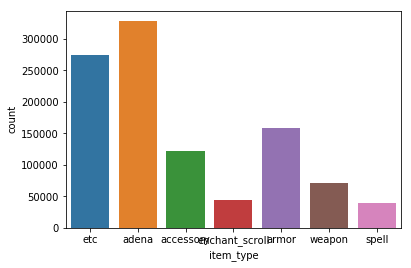

In [0]:
# 교환창 거래별 거래 종류
sns.countplot(trade_exchange['item_type'],order=train_trade['item_type'].unique())

교환창 거래는 쌍으로 봐야 하는지!!!

- 아데나 (=루찌) : 현물


개인 상점 거래의 item_price는 cash가 아니라, 아데나인듯!!!

In [0]:
trade_exchange.groupby([''])

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN
127986,1,00:00:01,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN
157271,1,00:00:01,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN
77026,1,00:00:08,1,as,71080,211226,21710,249759,etc,1.198492e-07,NaN


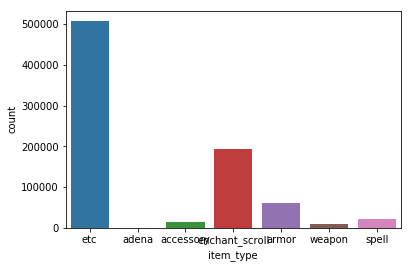

In [0]:
# 개인상점 거래종류
sns.countplot(trade_personal['item_type'],order=train_trade['item_type'].unique())

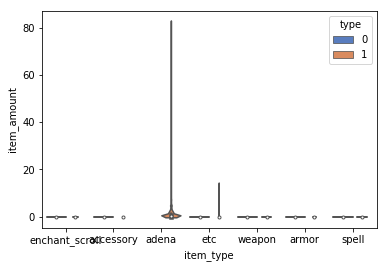

In [0]:
sns.violinplot(x = 'item_type', y = 'item_amount',data = train_trade, hue='type' ,palette="muted")

# 아데나를 교환장에서,,, 한번에 많이 교환하는 구나...!! ~> 

In [0]:
len(trade_exchange['source_acc_id'].unique()) # 교환장 파는 사람
print()
len(trade_exchange['target_acc_id'].unique()) # 교환장 사는 사람

57743

56474

In [0]:
len(trade_personal['source_acc_id'].unique()) # 개인상점 파는 사람
print()
len(trade_personal['target_acc_id'].unique()) # 개인상점 사는 사람

11154

53715

In [0]:
trade_personal.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
4,2,12:43:33,0,bd,14421,344503,65220,210558,etc,1.198492e-07,0.000639
5,2,16:56:12,0,aj,90975,346488,22407,110658,enchant_scroll,7.190952e-08,0.005693
7,7,14:14:46,0,bc,96563,209660,82644,54832,etc,1.198492e-07,0.067717
9,6,02:29:02,0,as,91572,154600,41504,4697,etc,4.793968e-08,0.183391
10,4,07:27:34,0,ad,40821,203225,92857,152705,etc,9.587936e-06,0.962812


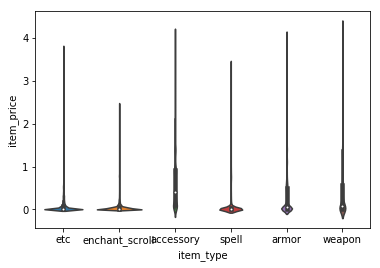

In [0]:
# 교환장에서는 가격이 나타나지 않음 -> 개인 상점에 대한 가격 파악!!

sns.violinplot(x='item_type',y = np.log1p(trade_personal['item_price']),data = trade_personal) 

- 신규 / 복귀유저 정의
- 이탈/ 비이탈 분류하여 고객군을 나눠보자

In [0]:
train_trade.head()

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price
312052,1,00:00:00,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625
49265,1,00:00:01,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN
97977,1,00:00:01,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN
127986,1,00:00:01,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN
157271,1,00:00:01,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN


### 서버별로 나눠서 바라보자!!

In [0]:
train_trade[train_trade['server']=='bi']

,day,time,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price


In [0]:
train_trade['server'].value_counts()

bd    298713
ay    136330
az    103487
ar     82647
an     76747
ad     68667
at     64581
ab     60907
ac     56855
aa     55605
as     55416
bc     54068
au     53496
ag     50744
af     49947
al     49338
am     48564
av     48403
ao     45886
ae     44792
bb     43833
ax     43674
ai     41477
ap     39826
aq     38483
ak     35408
aj     33345
aw     31147
ah     30171
bg      6489
bs       279
Name: server, dtype: int64

In [0]:
len(train_trade.groupby('source_acc_id')['type'].value_counts().unstack())#.isnull()#.sum(1).sum() # 한번에 하나의 거래를 더 많이함

# 하나의 거래만 하는 건수가 52393 ?? __> 교환장 거래가 이정도 아닌감
# 8252

60645

pandas.core.series.Series

In [0]:
tmp = train_trade.groupby('source_acc_id')['type'].value_counts().unstack().isnull()
t = [tmp.iloc[i,:].all() for i in range(len(tmp.index))]

In [0]:
for i in tmp

.all()

type
0    False
1    False
dtype: bool

In [0]:
train_activity[1:19]

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.0,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.000000,0.0,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.000000,0.0,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.0,0.011777,0.0
5,1,83200,109264,aa,0.074901,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
6,1,83200,396160,aa,0.245769,0.000000,0.047436,0.000000,0.000000,0,0.000000,0.000000,0.0,0.241790,0.0,0.000000,0.0
7,1,13896,302284,aa,0.004681,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
8,1,13896,95032,aa,0.414296,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.0,-0.000337,0.0
9,1,13896,374971,aa,0.007022,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.0,-0.141990,0.0
10,1,13896,10022,aa,0.002341,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


In [0]:
df = train_activity.head(20)

In [0]:
df[1:10,'acc_id']

TypeError: ignored

In [0]:
df.loc[1:5,'acc_id']


1    75001
2    75711
3    72230
4    34253
5    83200
Name: acc_id, dtype: int64

In [0]:
df.iloc[1:5,1:2]

,acc_id
1,75001
2,75711
3,72230
4,34253


In [0]:
df[0:5]

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,1,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,1.10514,0.034006,0.0
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.00000,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.00000,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.00000,0.011777,0.0


In [0]:
df.loc[1:5]

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
1,1,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,-0.013963,0.0
2,1,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.0,0.0,-0.001987,0.0
3,1,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.0,0.0,-0.028884,0.0
4,1,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,0.011777,0.0
5,1,83200,109264,aa,0.074901,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [0]:
dic = {}
for i in df['acc_id'].unique():
    dic[i] = len(df.loc[df['acc_id']==i])

In [0]:
type(df['acc_id'])

pandas.core.series.Series

In [0]:
for k,v in dic.items() :
    if  v < 5 :
        df.loc[df['acc_id'] == k, 'day'] = 'not' 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
df

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,not,75001,397380,aa,1.441844,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,1.10514,0.034006,0.0
1,not,75001,216231,aa,0.283219,2.247978,0.047085,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.013963,0.0
2,not,75711,308769,aa,1.036910,2.956638,0.321821,0.166593,0.003470,1,0.245883,0.247337,0.0,0.000000,0.00000,-0.001987,0.0
3,not,72230,387177,aa,0.229384,4.042102,0.099147,0.000000,0.001735,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.028884,0.0
4,not,34253,339862,aa,1.088405,0.596802,0.003377,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,0.011777,0.0
5,not,83200,109264,aa,0.074901,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
6,not,83200,396160,aa,0.245769,0.000000,0.047436,0.000000,0.000000,0,0.000000,0.000000,0.0,0.241790,0.00000,0.000000,0.0
7,not,13896,302284,aa,0.004681,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
8,not,13896,95032,aa,0.414296,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.000337,0.0
9,not,13896,374971,aa,0.007022,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.0,0.000000,0.00000,-0.141990,0.0


In [0]:
dic.items()

dict_items([(75001, 2), (75711, 1), (72230, 1), (34253, 1), (83200, 2), (13896, 4), (54399, 1), (67385, 1), (21932, 1), (30937, 1), (53141, 1), (94123, 2), (76110, 2)])

In [0]:

dic.items()[1] < 5 

TypeError: ignored

In [0]:
dic['acc_id']

KeyError: ignored